Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import pandas as pd
import time
import random

In [2]:
rawdf = pd.read_csv('admissiondata/Admission_Predict_Ver1.1.csv') # read data

In [3]:
df = pd.DataFrame(np.random.randn(100, 2))
msk = np.random.rand(len(rawdf)) < 0.8
rawdf = rawdf.drop('Serial No.', axis=1)

In [4]:
mu = np.mean(rawdf, 0)
sigma = np.std(rawdf, 0)

rawdf = (rawdf-mu) / sigma

In [5]:
train = rawdf[msk]
test = rawdf[~msk]

Preview

In [31]:
train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1.819238,1.778865,0.775582,1.137360,1.098944,1.776806,0.886405,1.406107
1,0.667148,-0.031601,0.775582,0.632315,1.098944,0.485859,0.886405,0.271349
4,-0.219074,-0.689952,-0.975168,-1.387862,-0.523513,-0.606480,-1.128152,-0.508797
6,0.401282,0.297575,-0.099793,-0.377773,0.558125,-0.623031,0.886405,0.200427
8,-1.282541,-0.854540,-1.850542,-1.387862,-2.145970,-0.954043,-1.128152,-1.572633


In [32]:
test.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
2,-0.041830,-0.525364,-0.099793,-0.377773,0.017306,-0.954043,0.886405,-0.012340
3,0.489904,0.462163,-0.099793,0.127271,-1.064332,0.154847,0.886405,0.555039
5,1.198882,1.285102,1.650957,1.137360,-0.523513,1.263738,0.886405,1.264263
7,-0.750808,-1.019128,-0.975168,-0.377773,0.558125,-1.119549,-1.128152,-0.296030
9,0.578526,0.132987,-0.099793,0.127271,-0.523513,0.038993,-1.128152,-1.927245


In [8]:
X_train = train.drop('Chance of Admit ', axis=1)
y_train = train['Chance of Admit ']
X_test = test.drop('Chance of Admit ', axis=1)
y_test = test['Chance of Admit ']

In [9]:
n_samples = len(y_train)
n_samples_test = len(y_test)

X_train = np.hstack((np.ones((n_samples,1)),X_train))
X_test = np.hstack((np.ones((n_samples_test,1)),X_test))

n_features = np.size(X_train,1)
params = np.zeros((n_features,1)).reshape(-1)

Gradient Descent Code

In [10]:
def compute_cost(X, y, params):
    n_samples = len(y)
    h = np.dot(X, params)
    return (np.sum((h-y)**2))

In [11]:
def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        prediction = np.dot(X, params)
        params = params - (learning_rate/n_samples) * np.dot(X.T, (prediction - y)) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

Initial cost is:  400.2423976444698 

Optimal parameters are: 
 [-0.00436817  0.19477324  0.16184938  0.06663335  0.04583798  0.11343753
  0.38855135  0.06624623] 

Final cost is:  [71.08869565]


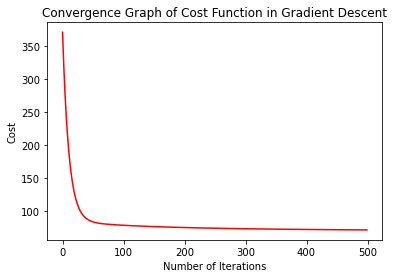

In [12]:
n_iters = 500
learning_rate = 0.01

initial_cost = compute_cost(X_train, y_train, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function in Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Stochastic Gradient Descent

In [13]:
def stochastic_gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))
    y = y.to_numpy()
    m = len(y)

    for i in range(n_iters):
        indices = np.arange(y.shape[0])
        np.random.shuffle(indices)
        X = X[indices]
        y = y[indices]
        
        prediction = np.dot(X, params)
        params = params - (learning_rate/m) * np.dot(X.T, (prediction - y)) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

Initial cost is:  400.2423976444698 

Optimal parameters are: 
 [-0.00436817  0.19477324  0.16184938  0.06663335  0.04583798  0.11343753
  0.38855135  0.06624623] 

Final cost is:  [71.08869565]


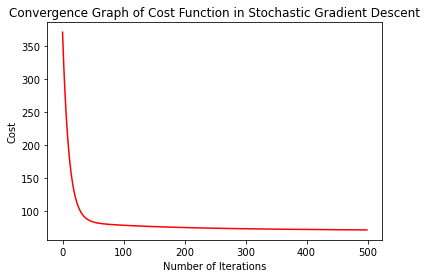

In [14]:
n_iters = 500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)

initial_cost = compute_cost(X_train, y_train, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function in Stochastic Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

Mini Batch Gradient Descent

In [15]:
def minibatch_gradient_descent(X, y, params, learning_rate, n_iters, batch_size =40):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))
    y = y.to_numpy()
    m = len(y)    
            
    for i in range(n_iters):
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
        
        for j in range(0,m,batch_size):
            X_i = X[j:j+batch_size,:]
            y_i = y[j:j+batch_size]        
            prediction = np.dot(X_i, params)
            params = params - (learning_rate/batch_size) * np.dot(X_i.T, (prediction - y_i)) 
        J_history[i] = compute_cost(X_i, y_i, params)

    return (J_history, params)

Initial cost is:  400.2423976444698 

Optimal parameters are: 
 [-0.00436304  0.19479451  0.1619295   0.06673546  0.04600337  0.11346368
  0.38816171  0.06628969] 

Final cost is:  [6.12099066]


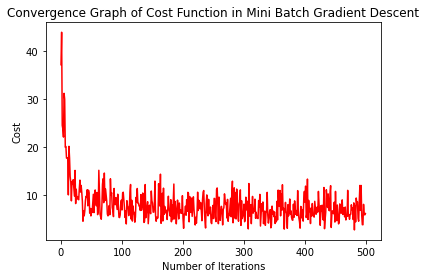

In [16]:
n_iters = 500
learning_rate = 0.001
params = np.zeros((n_features,1)).reshape(-1)

initial_cost = compute_cost(X_train, y_train, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function in Mini Batch Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

R square error

In [17]:
def r_square_error(X, y, optimal_params):    
    ypred = np.dot(X, optimal_params)
    ymean = np.sum(y)/y.size
    real_sq_diff = np.subtract(y, ymean)**2
    pred_sq_diff = np.subtract(ypred, ymean)**2
    r_square = sum(pred_sq_diff)/sum(real_sq_diff)
    return r_square

In [18]:
r_square_error(X_test, y_test,optimal_params)

0.8253970631918996

Root Mean Square Error

In [19]:
def rmse(X, y, optimal_params):
    ybar = np.dot(X, optimal_params)
    sq_diff = np.subtract(ybar, y)**2
    mean_sq_diff = np.mean(sq_diff)
    rms_error = np.sqrt(mean_sq_diff)
    return rms_error

In [20]:
rmse(X_test, y_test,optimal_params)

0.44230448024311086

Comparing Hyperparameters

1. Learning Rate

a) Standard Gradient Descent 

R square Error is:  0.8254426216253161
RMS Error is:  0.44229320582144416 

R square Error is:  0.6603032175197487
RMS Error is:  0.46594335841203477 

R square Error is:  0.8171924359765531
RMS Error is:  0.4464156844120545 

R square Error is:  0.8316975174849202
RMS Error is:  0.4415701680736272 

R square Error is:  0.8319223938503422
RMS Error is:  0.44174852127611447 



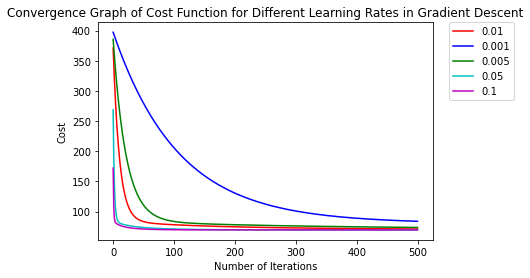

In [37]:
n_iters = 500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'r', label="0.01")
std_rsqe_lr1 = r_square_error(X_test, y_test,optimal_params)
std_rmse_lr1 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_lr1)
print("RMS Error is: ", std_rmse_lr1, "\n")

n_iters = 500
learning_rate = 0.001
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'b', label="0.001")
std_rsqe_lr2 = r_square_error(X_test, y_test,optimal_params)
std_rmse_lr2 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_lr2)
print("RMS Error is: ", std_rmse_lr2, "\n")

n_iters = 500
learning_rate = 0.005
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'g', label="0.005")
std_rsqe_lr3 = r_square_error(X_test, y_test,optimal_params)
std_rmse_lr3 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_lr3)
print("RMS Error is: ", std_rmse_lr3, "\n")

n_iters = 500
learning_rate = 0.05
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'c', label="0.05")
std_rsqe_lr4 = r_square_error(X_test, y_test,optimal_params)
std_rmse_lr4 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_lr4)
print("RMS Error is: ", std_rmse_lr4, "\n")

n_iters = 500
learning_rate = 0.1
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'm', label="0.1")
std_rsqe_lr5 = r_square_error(X_test, y_test,optimal_params)
std_rmse_lr5 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_lr5)
print("RMS Error is: ", std_rmse_lr5, "\n")

# n_iters = 500
# learning_rate = 0.5
# params = np.zeros((n_features,1)).reshape(-1)
# (J_history, optimal_params) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)
# plt.plot(range(len(J_history)), J_history, 'y')


plt.title("Convergence Graph of Cost Function for Different Learning Rates in Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

    b) Stochastic Gradient Descent 

R square Error is:  0.8254426216253161
RMS Error is:  0.4422932058214441 

R square Error is:  0.6603032175197487
RMS Error is:  0.46594335841203477 

R square Error is:  0.8171924359765532
RMS Error is:  0.4464156844120545 

R square Error is:  0.8316975174849203
RMS Error is:  0.4415701680736272 

R square Error is:  0.8319223938503423
RMS Error is:  0.44174852127611447 



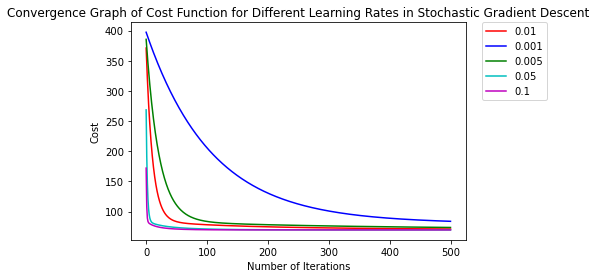

In [38]:
n_iters = 500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'r', label="0.01")
sto_rsqe_lr1 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_lr1 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_lr1)
print("RMS Error is: ", sto_rmse_lr1, "\n")

n_iters = 500
learning_rate = 0.001
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'b', label="0.001")
sto_rsqe_lr2 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_lr2 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_lr2)
print("RMS Error is: ", sto_rmse_lr2, "\n")

n_iters = 500
learning_rate = 0.005
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'g', label="0.005")
sto_rsqe_lr3 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_lr3 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_lr3)
print("RMS Error is: ", sto_rmse_lr3, "\n")

n_iters = 500
learning_rate = 0.05
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'c', label="0.05")
sto_rsqe_lr4 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_lr4 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_lr4)
print("RMS Error is: ", sto_rmse_lr4, "\n")

n_iters = 500
learning_rate = 0.1
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'm', label="0.1")
sto_rsqe_lr5 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_lr5 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_lr5)
print("RMS Error is: ", sto_rmse_lr5, "\n")

plt.title("Convergence Graph of Cost Function for Different Learning Rates in Stochastic Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

c) Mini batch gradient descent

R square Error is:  0.8239227843528748
RMS Error is:  0.44168906118889706 

R square Error is:  0.8253061278797846
RMS Error is:  0.44230373038757914 

R square Error is:  0.8327308244396855
RMS Error is:  0.44157759050286854 

R square Error is:  0.8572793365554204
RMS Error is:  0.44268613816217506 

R square Error is:  0.8047586972025514
RMS Error is:  0.4416838922413854 



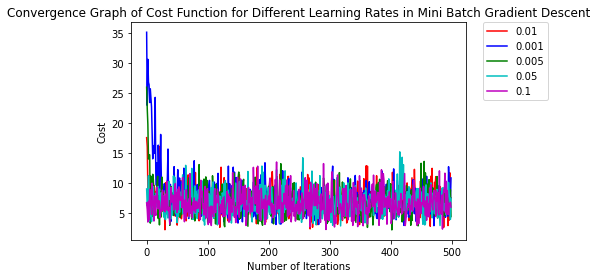

In [39]:
n_iters = 500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'r', label="0.01")
mb_rsqe_1 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_1 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_1)
print("RMS Error is: ", mb_rmse_1, "\n")

n_iters = 500
learning_rate = 0.001
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'b', label="0.001")
mb_rsqe_2 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_2 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_2)
print("RMS Error is: ", mb_rmse_2, "\n")

n_iters = 500
learning_rate = 0.005
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'g', label="0.005")
mb_rsqe_3 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_3 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_3)
print("RMS Error is: ", mb_rmse_3, "\n")

n_iters = 500
learning_rate = 0.05
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'c', label="0.05")
mb_rsqe_4 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_4 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_4)
print("RMS Error is: ", mb_rmse_4, "\n")

n_iters = 500
learning_rate = 0.1
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'm', label="0.1")
mb_rsqe_5 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_5 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_5)
print("RMS Error is: ", mb_rmse_5, "\n")


plt.title("Convergence Graph of Cost Function for Different Learning Rates in Mini Batch Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

2. No of iterations

a) Standard Gradient Descent

R square Error is:  0.8309024136440836
RMS Error is:  0.4410812559077707 

R square Error is:  0.8297189542569392
RMS Error is:  0.44086075627553656 

R square Error is:  0.8254426216253162
RMS Error is:  0.4422932058214441 

R square Error is:  0.8172142205619899
RMS Error is:  0.44641181640230926 

R square Error is:  0.805476046716199
RMS Error is:  0.4527508917476495 



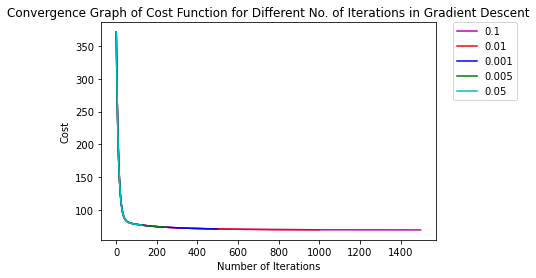

In [40]:
n_iters = 1500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'm', label="0.1")
std_rsqe_it1 = r_square_error(X_test, y_test,optimal_params)
std_rmse_it1 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_it1)
print("RMS Error is: ", std_rmse_it1, "\n")

n_iters = 1000
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'r', label="0.01")
std_rsqe_it2 = r_square_error(X_test, y_test,optimal_params)
std_rmse_it2 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_it2)
print("RMS Error is: ", std_rmse_it2, "\n")

n_iters = 500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'b', label="0.001")
std_rsqe_it3 = r_square_error(X_test, y_test,optimal_params)
std_rmse_it3 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_it3)
print("RMS Error is: ", std_rmse_it3, "\n")

n_iters = 250
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'g', label="0.005")
std_rsqe_it4 = r_square_error(X_test, y_test,optimal_params)
std_rmse_it4 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_it4)
print("RMS Error is: ", std_rmse_it4, "\n")

n_iters = 125
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'c', label="0.05")
std_rsqe_it5 = r_square_error(X_test, y_test,optimal_params)
std_rmse_it5 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_it5)
print("RMS Error is: ", std_rmse_it5, "\n")

plt.title("Convergence Graph of Cost Function for Different No. of Iterations in Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

b) Stochastic Gradient Descent

R square Error is:  0.8318169846615197
RMS Error is:  0.44166333478116643 

R square Error is:  0.831438177017511
RMS Error is:  0.4413841483034112 

R square Error is:  0.8297189542569392
RMS Error is:  0.44086075627553656 

R square Error is:  0.8254426216253162
RMS Error is:  0.4422932058214441 

R square Error is:  0.8172142205619899
RMS Error is:  0.44641181640230926 

R square Error is:  0.8054760467161989
RMS Error is:  0.4527508917476495 



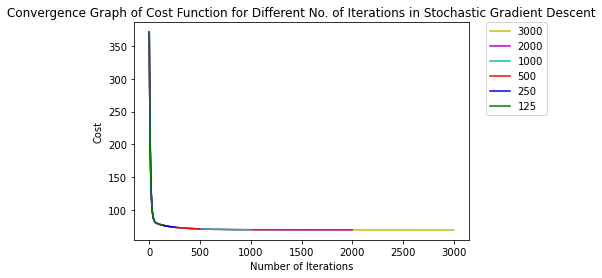

In [41]:
n_iters = 3000
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'y', label="3000")
sto_rsqe_it1 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_it1 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_it1)
print("RMS Error is: ", sto_rmse_it1, "\n")

n_iters = 2000
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'm', label="2000")
sto_rsqe_it2 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_it2 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_it2)
print("RMS Error is: ", sto_rmse_it2, "\n")

n_iters = 1000
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'c', label="1000")
sto_rsqe_it3 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_it3 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_it3)
print("RMS Error is: ", sto_rmse_it3, "\n")

n_iters = 500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'r', label="500")
sto_rsqe_it4 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_it4 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_it4)
print("RMS Error is: ", sto_rmse_it4, "\n")

n_iters = 250
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'b', label="250")
sto_rsqe_it5 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_it5 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_it5)
print("RMS Error is: ", sto_rmse_it5, "\n")

n_iters = 125
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = stochastic_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'g', label="125")
sto_rsqe_it6 = r_square_error(X_test, y_test,optimal_params)
sto_rmse_it6 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", sto_rsqe_it6)
print("RMS Error is: ", sto_rmse_it6, "\n")


plt.title("Convergence Graph of Cost Function for Different No. of Iterations in Stochastic Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

c) Mini Batch Gradient Descent

R square Error is:  0.8296495070234553
RMS Error is:  0.44086016968693226 

R square Error is:  0.8254219179432651
RMS Error is:  0.4423043090066472 

R square Error is:  0.8171131405389829
RMS Error is:  0.4464380430405204 

R square Error is:  0.8172142205619899
RMS Error is:  0.44641181640230926 



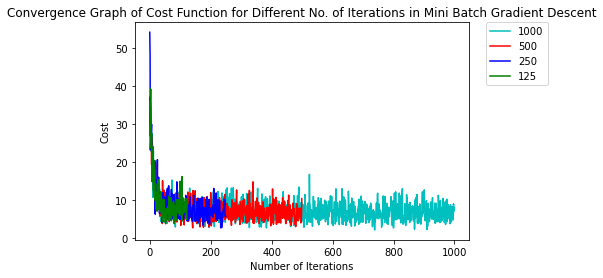

In [42]:
n_iters = 1000
learning_rate = 0.001
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'c', label="1000")
mb_rsqe_it1 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_it1 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_it1)
print("RMS Error is: ", mb_rmse_it1, "\n")

n_iters = 500
learning_rate = 0.001
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'r', label="500")
mb_rsqe_it2 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_it2 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_it2)
print("RMS Error is: ", mb_rmse_it2, "\n")

n_iters = 250
learning_rate = 0.001
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'b', label="250")
mb_rsqe_it3 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_it3 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_it3)
print("RMS Error is: ", mb_rmse_it3, "\n")

n_iters = 125
learning_rate = 0.001
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)
plt.plot(range(len(J_history)), J_history, 'g', label="125")
mb_rsqe_it4 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_it4 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", std_rsqe_it4)
print("RMS Error is: ", std_rmse_it4, "\n")

plt.title("Convergence Graph of Cost Function for Different No. of Iterations in Mini Batch Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

3. Batch Size

c) Mini Batch Gradient Descent

R square Error is:  0.809970401494806
RMS Error is:  0.44179146051616514 

R square Error is:  0.8339285354515467
RMS Error is:  0.4418163684040455 

R square Error is:  0.8290041336542594
RMS Error is:  0.4417208770260985 

R square Error is:  0.8322044798720547
RMS Error is:  0.441704574148468 

R square Error is:  0.831951209507129
RMS Error is:  0.44158055983732464 



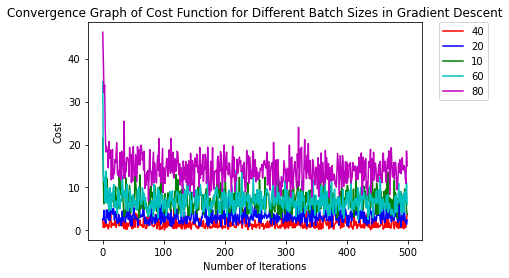

In [44]:
n_iters = 500
learning_rate = 0.01
batch_size = 10
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters, batch_size)
plt.plot(range(len(J_history)), J_history, 'r', label="40")
mb_rsqe_bs1 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_bs1 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_bs1)
print("RMS Error is: ", mb_rmse_bs1, "\n")

n_iters = 500
learning_rate = 0.01
batch_size = 20
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters, batch_size)
plt.plot(range(len(J_history)), J_history, 'b', label="20")
mb_rsqe_bs2 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_bs2 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_bs2)
print("RMS Error is: ", mb_rmse_bs2, "\n")

n_iters = 500
learning_rate = 0.01
batch_size = 40
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters, batch_size)
plt.plot(range(len(J_history)), J_history, 'g', label="10")
mb_rsqe_bs3 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_bs3 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_bs3)
print("RMS Error is: ", mb_rmse_bs3, "\n")

n_iters = 500
learning_rate = 0.01
batch_size = 60
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters, batch_size)
plt.plot(range(len(J_history)), J_history, 'c', label="60")
mb_rsqe_bs4 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_bs4 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_bs4)
print("RMS Error is: ", mb_rmse_bs4, "\n")

n_iters = 500
learning_rate = 0.01
batch_size = 80
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters, batch_size)
plt.plot(range(len(J_history)), J_history, 'm', label="80")
mb_rsqe_bs5 = r_square_error(X_test, y_test,optimal_params)
mb_rmse_bs5 = rmse(X_test, y_test,optimal_params)
print("R square Error is: ", mb_rsqe_bs5)
print("RMS Error is: ", mb_rmse_bs5, "\n")

# n_iters = 500
# learning_rate = 120
# params = np.zeros((n_features,1)).reshape(-1)
# (J_history, optimal_params) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters, batch_size)
# plt.plot(range(len(J_history)), J_history, 'y', label="120")


plt.title("Convergence Graph of Cost Function for Different Batch Sizes in Gradient Descent")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

4. Errors

a) Standard Gradient Descent

In [28]:
n_iters = 500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params_std_gd) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)

std_rsqe = r_square_error(X_test, y_test,optimal_params_std_gd)
std_rmse = rmse(X_test, y_test,optimal_params_std_gd)

print("For Standard Gradient Descent")
print("R square Error is: ", std_rsqe)
print("RMS Error is: ", std_rmse, "\n")

n_iters = 500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params_sto_gd) = gradient_descent(X_train, y_train, params, learning_rate, n_iters)

sto_rsqe = r_square_error(X_test, y_test,optimal_params_sto_gd)
sto_rmse = rmse(X_test, y_test,optimal_params_sto_gd)

print("For Stochastic Gradient Descent")
print("R square Error is: ", sto_rsqe)
print("RMS Error is: ", sto_rmse, "\n")

n_iters = 500
learning_rate = 0.01
params = np.zeros((n_features,1)).reshape(-1)
(J_history, optimal_params_mb_gd) = minibatch_gradient_descent(X_train, y_train, params, learning_rate, n_iters)

mb_rsqe = r_square_error(X_test, y_test,optimal_params_mb_gd)
mb_rmse = rmse(X_test, y_test,optimal_params_mb_gd)

print("For Mini Batch Gradient Descent")
print("R square Error is: ", mb_rsqe)
print("RMS Error is: ", mb_rmse, "\n")

For Standard Gradient Descent
R square Error is:  0.8254426216253161
RMS Error is:  0.44229320582144416 

For Stochastic Gradient Descent
R square Error is:  0.8254426216253161
RMS Error is:  0.44229320582144416 

For Mini Batch Gradient Descent
R square Error is:  0.8316764472553592
RMS Error is:  0.44173783181254567 

